# Computational and Artifical Intelligenge Assignment 1

Problem Solving by Searching using BFS and DFS (Bidirectional Search)

Weightage: 10%

Date of Posting - 04/July/2019

Deadline - 19/July/2019

Please enter group and individual information here

Group ID/Number:

Group Members BITS ID:

Things to follow

1. Use appropriate data structures for the fringes and explain the reasoning behind the usage. You need not create data structures, instead use available libraries directly.

2. Avoid any hard-coding unless absolutely necessary.

3. Provide proper documentation

Coding begins now!!!

Define the environment representation in the following code block

In [1]:
#Environment representation goes here
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
## Create a Diagraph for problem representation
## Empty Digraph
G = nx.DiGraph()
## Add nodes 
G.add_nodes_from([i for i in range (0,12)])

## Add Edges with Label Left, Right and weight
## Direction Right= 1 , Left = 0
edge_list = [(0,1,{"direction": 1,"weight":1}),(0,11,{"direction": 0,"weight":1}), \
             (1,2,{"direction": 1,"weight":1}),(1,0,{"direction": 0,"weight":1}), \
             (2,3,{"direction": 1,"weight":1}),(2,1,{"direction": 0,"weight":1}), \
             (3,4,{"direction": 1,"weight":2}),(3,2,{"direction": 0,"weight":1}), \
             (4,5,{"direction": 1,"weight":2}),(4,3,{"direction": 0,"weight":2}), \
             (5,6,{"direction": 1,"weight":2}),(5,4,{"direction": 0,"weight":2}), \
             (6,7,{"direction": 1,"weight":1}),(6,5,{"direction": 0,"weight":2}), \
             (7,8,{"direction": 1,"weight":1}),(7,6,{"direction": 0,"weight":1}), \
             (8,9,{"direction": 1,"weight":1}),(8,7,{"direction": 0,"weight":1}), \
             (9,10,{"direction": 1,"weight":1}),(9,8,{"direction": 0,"weight":1}), \
             (10,11,{"direction": 1,"weight":1}),(10,9,{"direction": 0,"weight":1}), \
             (11,11,{"direction": 1,"weight":1}),(11,10,{"direction": 0,"weight":1}), \
            ]
G.add_edges_from(edge_list)

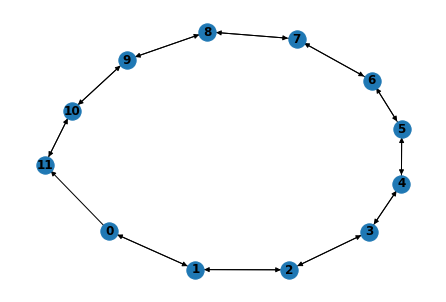

In [12]:
nx.draw(G, with_labels=True, font_weight='bold')

Define the fringe (data structure) and its supported methods in the following code block

In [3]:
#Fringe representation and its associated methods
from collections import deque

## SET START AND GOAL STATE
START = 1
GOAL = 10

## DataStructure for BFS
bfs_frontier_set = deque([START])  ## initial state is always'D01:1'
bfs_explored_set = []
## DataStructure for DFS
dfs_frontier_set = []
dfs_explored_set = []

def dfs_worker(G,Source,depth):
    """ Returns forntier set and explored set for input Graph, Source node and depth
        Parameters
        ----------
        G:NetworkX graph
        Source:Node in Graph to search
        depth: DFS node search depth
        Returns
        -------
        succ: list
        forntier set 
        explored set
    """
    frontierSet = []
    ExploredSet = []
    nodeList = []
    for k,v in dict(nx.dfs_successors(G,source=Source,depth_limit=depth)).items():
        if k not in ExploredSet:
            ExploredSet.append(k)
        for elem in v:
            nodeList.append(elem)
    frontierSet = [x for x in nodeList if x not in ExploredSet]
    return ExploredSet,frontierSet
    
#Algorithm BFS
def bfs_worker(G,Source,bfsExploredSet):
    """ Returns generated nodes of input Graph Source
        Parameters
        ----------
        G : NetworkX graph
        Source : Node in Graph to search
        Explored Set 
        Returns
        -------
        succ: list
        A list of successor nodes as values. (generated Node)
    """
    nodeList = []
    for k,v in dict(nx.bfs_successors(G,source=Source,depth_limit=1)).items():
        for elem in v:
            if elem not in bfsExploredSet:
                nodeList.append(elem)
    return nodeList

def bfs_dfs_intersect(dfs_frontier_set,bfs_frontier_set):
    """ Returns node where bfs and dfs meets
        Parameters
        ----------
        BFS Frontier Set
        DFS Frontier set
        Returns
        -------
        succ: list
        A list of intersecting nodes
    """
    return list(set(dfs_frontier_set) & set(bfs_frontier_set))

Define your algorithm in the following code block

In [4]:
def bidirectional_traversal(G,bfs_frontier_set,bfs_explored_set,GOAL):
    """ Returns dfs_explored_set,dfs_frontier_set and 
        intersection of bfs_frontier_set,dfs_frontier_set
        Parameters
        ----------
        BFS Frontier Set
        BFS explored set
        GOAL state
        Returns
        -------
        succ: 
        dfs_explored_set
        dfs_frontier_set
        intersecting nodes
    """
    max_nodes_in_mem = 0 
    dfsnode = GOAL  ## Target Node (Goal state)
    depth = 0
    intersect_flag = False
    dfs_frontier_set = []
    dfs_explored_set = []
    ## Loop until bfs frontier set is empty
    while bfs_frontier_set : 
        bfsnode = bfs_frontier_set.popleft()
        if bfsnode not in bfs_explored_set:
            bfs_explored_set.append(bfsnode) 
        if bfsnode == GOAL : ## Break if GOAL State is returned 
            break
        ## Break if dfs frontier and bfs frontier have common node(s)
        [ bfs_frontier_set.append(elem) for elem in bfs_worker(G,bfsnode,bfs_explored_set)]
        ##Debug display
        print("BFS Frontier Set : " ,bfs_frontier_set)
        print("BFS Explored Set : " ,bfs_explored_set)
        print("===========================================")
        if bfs_dfs_intersect(bfs_frontier_set,dfs_frontier_set):
            intersect_flag = True
            break
        ## Increase the Depth of DFS if DFS explored set is less than 
        ## bfs explored set
        if depth < len(G) and len(dfs_explored_set) < len(bfs_explored_set):
            depth = depth + 1  
            dfs_explored_set, dfs_frontier_set = dfs_worker(G,dfsnode,depth)
            ##Debug display
            print("DFS Depth :",depth)
            print("DFS Frontier Set : " ,dfs_frontier_set)
            print("DFS Explored Set : " ,dfs_explored_set)
            print("===========================================")
        if bfs_dfs_intersect(bfs_frontier_set,dfs_frontier_set):
            intersect_flag = True
            break
        max_nodes_in_mem = max (max_nodes_in_mem,len(bfs_frontier_set)+len(dfs_frontier_set))
    if intersect_flag:
        print("intersection Found")
        max_nodes_in_mem = max (max_nodes_in_mem,len(bfs_frontier_set)+len(dfs_frontier_set))
        return dfs_explored_set,dfs_frontier_set,bfs_dfs_intersect(bfs_frontier_set,dfs_frontier_set),max_nodes_in_mem
    else:
        return dfs_explored_set,dfs_frontier_set,None

Feel free to add code blocks for any other methods needed starting here.

In [5]:
def bfs(G, START,END):
    """ Returns the path from the initial state to the intersection set nodes 
        Parameters
        ----------
        Graph (networkx)
        START : initial state (always D01)
        END : intersection of bfs_frontier_set,dfs_frontier_set
        Returns
        -------
        succ: 
        String : Path from START to END node
    """
    # maintain a queue of paths
    queue = []
    # push the first path into the queue
    queue.append([START])
    while queue:
        # get the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        # path found
        if node == END:
            return path
        # enumerate all adjacent nodes, construct a new path and push it into the queue
        for adjacent in G.neighbors(node):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)

def computePathAndDepth(G,intersect_node,START,GOAL):
    """ Returns the path from the initial state to the intersection nodes and GOAL
        Parameters
        ----------
        Graph (networkx)
        Intersection List of bfs_frontier_set,dfs_frontier_set
        START : initial state (always D01)
        GOAL : Final state
        Returns
        -------
        succ: 
        String : Path from START to GOAL node,
        Can be multiple if intersection list has more than one element
    """
    fowardPath = nx.shortest_path(G,source=START,target=intersect_node)
    backwardPath = nx.shortest_path(G,source=GOAL,target=intersect_node)
    fpathDepth = len(fowardPath) -1 
    bpathDepth = len(backwardPath)-1
    if len(fowardPath)>1:
        last_elem = fowardPath.pop()
    return fowardPath + backwardPath[::-1],max(fpathDepth,bpathDepth,0)

Call your main function/algorithm block in the next code block with appropriate input representation

In [6]:
max_nodes_in_mem = 0
dfs_explored_set,dfs_frontier_set,intersectlist,max_nodes_in_mem = bidirectional_traversal(G,bfs_frontier_set,bfs_explored_set,GOAL)

BFS Frontier Set :  deque([2, 0])
BFS Explored Set :  [1]
DFS Depth : 1
DFS Frontier Set :  [11, 9]
DFS Explored Set :  [10]
BFS Frontier Set :  deque([0, 3])
BFS Explored Set :  [1, 2]
DFS Depth : 2
DFS Frontier Set :  [11, 8]
DFS Explored Set :  [10, 9]
BFS Frontier Set :  deque([3, 11])
BFS Explored Set :  [1, 2, 0]
intersection Found


The agent should provide expected output for questions mentioned below in the subsequent blocks

(1) Path taken to reach destination from source

In [7]:
PathList = []
for elem in intersectlist:
    Path,Depth = computePathAndDepth(G,elem,START,GOAL)
    PathList.append((Path,Depth))
    print("-->".join([ "D"+ str(i).zfill(2) for i in Path]))
print(PathList)

D01-->D00-->D11-->D10
[([1, 0, 11, 10], 2)]


(2) Cost of the path

In [8]:
# Execute statement to retrieve the cost of the path here

for pathtuple in PathList:
    cost = 0
    pathLength = 0
    path,depth = pathtuple
    pathLength = len(path)
    if pathLength >=2:
        for i in range(0,pathLength-1):
            cost = cost + G.get_edge_data(path[i],path[i+1])['weight']
    print('Cost of Path : ' , cost)

Cost of Path :  3


(3) Total Number of nodes expanded to get this state

In [9]:
# Execute statement to retrieve the total number of nodes expanded to get this state here
print ("total nodes expanded to get to state ", len(bfs_explored_set) + len(dfs_explored_set))

total nodes expanded to get to state  5


(4) Maximum number of nodes kept at the memory at any point in time

In [10]:
# Execute Output for the maximum number of nodes kept at the memory at any point in time here
print("Max Nodes in memory ", max_nodes_in_mem)

Max Nodes in memory  4


(5) The depth at which the solution is found ( you might want to consider the depth of both dfs and bfs together) 

In [11]:
# Execute statement to retrieve the depth at which the solution is found here
#( you might want to consider the depth of both dfs and bfs together) 
for pathtuple in PathList:
    path,depth = pathtuple
    print('Maximum of Depth at which bfs dfs intersect : ' , depth)

Maximum of Depth at which bfs dfs intersect :  2


All the best!! Happy Coding!!
Let human intelligence prevail